In [31]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
%matplotlib inline

In [32]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = 1.0, your algorithm predicts a "cat" picture.


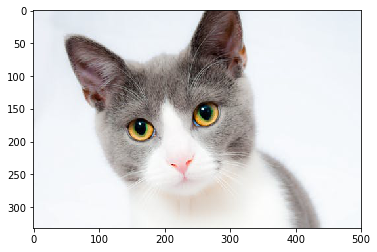

In [33]:
m_train=train_set_x_orig.shape[0]
num_px=train_set_x_orig.shape[1]
train_set_x_flat=train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
train_set_x=train_set_x_flat/255

def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s
def initialize_zeros(dim):
    w=np.zeros((dim,1))
    b=0
    return w,b

def propagate(w,b,X,Y):
    m=X.shape[1]
    A=1/(1+np.exp(-(np.dot(w.T,X)+b)))
    cost=-(Y*np.log(A)+(1-Y)*np.log(1-A))
    dw=np.dot(X,(A-Y).T)/m
    db=np.sum(A-Y)/m
    cost=np.squeeze(cost)
    grads={"dw":dw,"db":db}
    return grads,cost

def optimize(w,b,X,Y,num_iterations,learning_rate):
    for i in range(num_iterations):
        grads,cost=propagate(w,b,X,Y)
        dw=grads["dw"]
        db=grads["db"]
        w=w-learning_rate*dw
        b=b-learning_rate*db
    param={"w":w,"b":b}
    return param,grads

def predict(w,b,X):
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    w=w.reshape((X.shape[0],1))
    A= sigmoid(np.dot(w.T,X)+b)
    Y_prediction=np.round(A)
    return Y_prediction

def model(X_train,Y_train,num_iterations,learning_rate):
       w,b=initialize_zeros(X_train.shape[0])
       parameters, grads=  optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
       w = parameters["w"]
       b = parameters["b"]
       d = {
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
       return d
d=model(train_set_x, train_set_y,num_iterations = 2000, learning_rate = 0.005)       

my_image = "c.jpeg"
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
image = image/255.
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")